In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("index_1.csv")

In [5]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
df.tail()

,date,datetime,cash_type,card,money,coffee_name
3631,2025-03-23,2025-03-23 10:34:54.894,card,ANON-0000-0000-1158,35.76,Cappuccino
3632,2025-03-23,2025-03-23 14:43:37.362,card,ANON-0000-0000-1315,35.76,Cocoa
3633,2025-03-23,2025-03-23 14:44:16.864,card,ANON-0000-0000-1315,35.76,Cocoa
3634,2025-03-23,2025-03-23 15:47:28.723,card,ANON-0000-0000-1316,25.96,Americano
3635,2025-03-23,2025-03-23 18:11:38.635,card,ANON-0000-0000-1275,35.76,Latte


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df["datetime"]  = pd.to_datetime(df["datetime"])

In [9]:
df["time"] = df["datetime"].dt.time

In [23]:
df[["date","time","money","cash_type","card","coffee_name"]].head(11)

,date,time,money,cash_type,card,coffee_name
0,2024-03-01,10:15:50.520000,38.7,card,ANON-0000-0000-0001,Latte
1,2024-03-01,12:19:22.539000,38.7,card,ANON-0000-0000-0002,Hot Chocolate
2,2024-03-01,12:20:18.089000,38.7,card,ANON-0000-0000-0002,Hot Chocolate
3,2024-03-01,13:46:33.006000,28.9,card,ANON-0000-0000-0003,Americano
4,2024-03-01,13:48:14.626000,38.7,card,ANON-0000-0000-0004,Latte
5,2024-03-01,15:39:47.726000,33.8,card,ANON-0000-0000-0005,Americano with Milk
6,2024-03-01,16:19:02.756000,38.7,card,ANON-0000-0000-0006,Hot Chocolate
7,2024-03-01,18:39:03.580000,33.8,card,ANON-0000-0000-0007,Americano with Milk
8,2024-03-01,19:22:01.762000,38.7,card,ANON-0000-0000-0008,Cocoa
9,2024-03-01,19:23:15.887000,33.8,card,ANON-0000-0000-0008,Americano with Milk


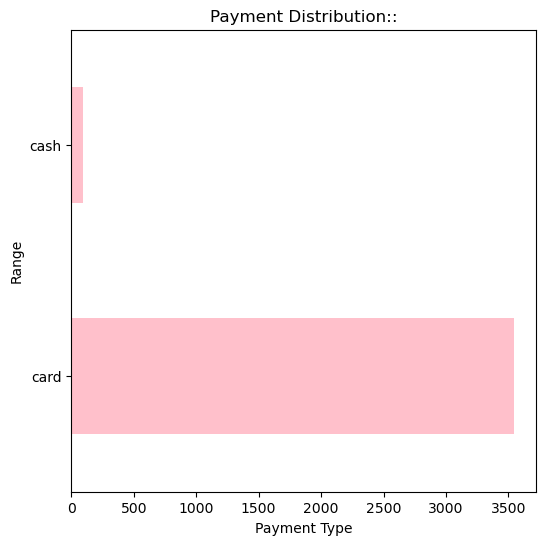

In [41]:
cash_type_count = df["cash_type"].value_counts()

plt.figure(figsize =(6,6))
cash_type_count.plot(kind="barh", color="pink")
plt.title("Payment Distribution::")
plt.xlabel("Payment Type")
plt.ylabel("Range")
plt.show()

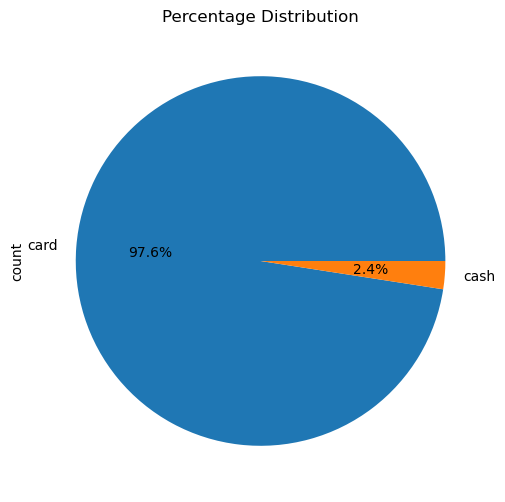

In [45]:
plt.figure(figsize=(6,6))
cash_type_count.plot(kind="pie",autopct='%1.1f%%')
plt.title("Percentage Distribution")
plt.show()

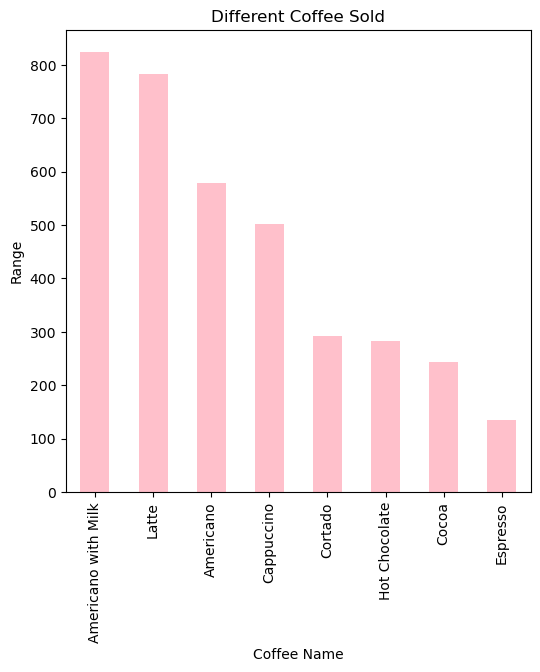

In [37]:
coffee_type = df["coffee_name"].value_counts()
plt.figure(figsize =(6,6))
coffee_type.plot(kind="bar",color="pink")
plt.title("Different Coffee Sold")
plt.xlabel("Coffee Name")
plt.ylabel("Range")
plt.show()

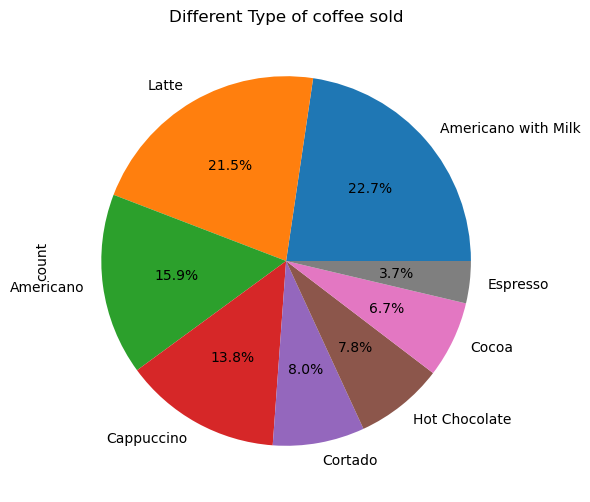

In [47]:
plt.figure(figsize=(6,6))
coffee_type.plot(kind="pie",autopct='%1.1f%%')
plt.title("Different Type of coffee sold")
plt.show()

In [48]:
Total_Earnings = df["money"].sum()

In [49]:
Total_Earnings

np.float64(115431.58)

In [50]:
grouped = df.groupby("coffee_name")["money"].sum()

In [51]:
print((grouped/Total_Earnings)*100)

coffee_name
Americano              13.048648
Americano with Milk    21.890994
Cappuccino             15.623229
Cocoa                   7.518012
Cortado                 6.527555
Espresso                2.438050
Hot Chocolate           8.812545
Latte                  24.140967
Name: money, dtype: float64


Text(0, 0.5, 'Earnings')

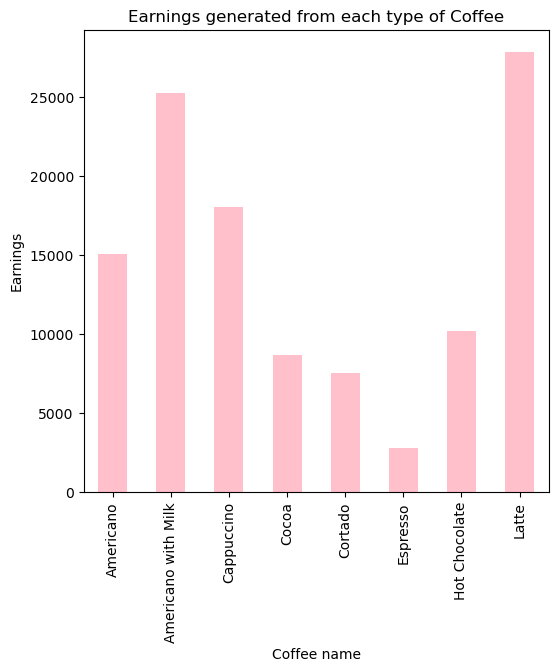

In [53]:
plt.figure(figsize =(6,6))
grouped.plot(kind="bar",color="pink")
plt.title("Earnings generated from each type of Coffee")
plt.xlabel("Coffee name")
plt.ylabel("Earnings")

In [54]:
df['date'] = pd.to_datetime(df['date'])

date_wise_Earnings=df.groupby("date")["money"].sum()

In [55]:
print(date_wise_Earnings)

date
2024-03-01    396.30
2024-03-02    228.10
2024-03-03    349.10
2024-03-04    135.20
2024-03-05    338.50
               ...  
2025-03-19    623.56
2025-03-20    597.60
2025-03-21    636.80
2025-03-22    365.42
2025-03-23    204.76
Name: money, Length: 381, dtype: float64


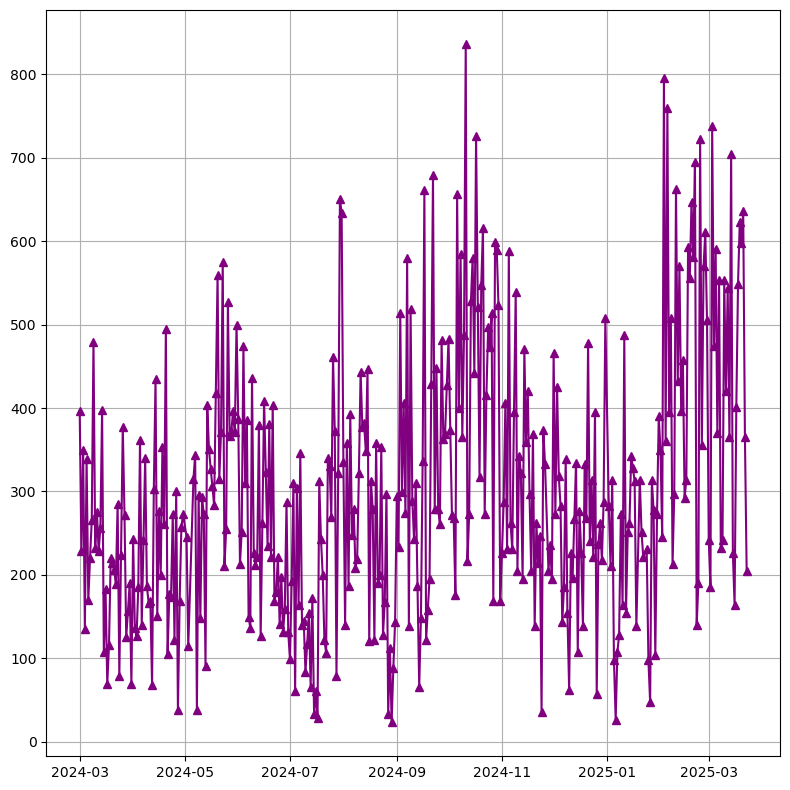

In [56]:
plt.figure(figsize=(8,8))
plt.plot(date_wise_Earnings.index,date_wise_Earnings.values, marker='^', linestyle='-', color='purple')
plt.grid(True)
plt.tight_layout()

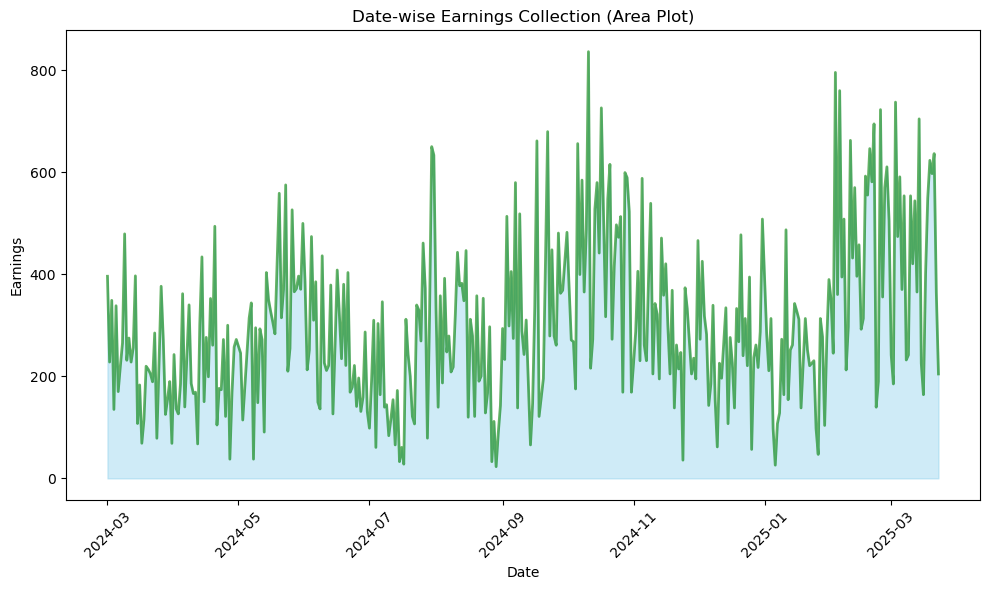

In [57]:
plt.figure(figsize=(10, 6))
plt.fill_between(date_wise_Earnings.index,date_wise_Earnings.values, color='skyblue', alpha=0.4)
plt.plot(date_wise_Earnings.index,date_wise_Earnings.values, color='green', alpha=0.6, linewidth=2)
plt.title('Date-wise Earnings Collection (Area Plot)')
plt.xlabel('Date')
plt.ylabel('Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()